# Importation des bibliothéques

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import spacy 
from wordcloud import WordCloud, STOPWORDS

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from nltk.tokenize import word_tokenize

from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import (precision_recall_fscore_support , classification_report, accuracy_score,f1_score,precision_score,recall_score,roc_auc_score)
from time import time
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


import utils as ut

[nltk_data] Downloading package punkt to /home/anyes/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/anyes/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/anyes/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/anyes/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Etape 0 : Chargement de données movies

Dans cette partie nous allons rechargé les données de movies afin d'effectuer l'analyse de sentiments

In [2]:
path = "../datasets/movies/movies1000/"
alltxts,alllabs = ut.load_movies(path)

Création du DataFrame

In [3]:
movies_df = pd.DataFrame()
movies_df['text'] = alltxts
movies_df['label'] = alllabs

movies_df

,text,label
0,the kids in the hall are an acquired taste . \...,0
1,capsule : a science fiction allegory . \nat th...,0
2,there is a rule when it comes to movies . \na ...,0
3,it's amazing how a comedian can have the some ...,0
4,"absolute power , the new film produced and dir...",0
...,...,...
1995,"as i walked out of crouching tiger , hidden dr...",1
1996,"when andy leaves for cowboy camp , his mother ...",1
1997,plot : a bunch of bad guys dressed up as elvis...,1
1998,trees lounge is the directoral debut from one ...,1


# Comparaisons du temps d'apprentissage sur les différents modèles

In [6]:
def fonction_eval(vectorizer,state,alltexts,alllabs):

    [X_all_train, X_all_test, Y_train, y_test]  = train_test_split(alltexts, alllabs, test_size=0.2, random_state=state, shuffle=True)
    X_train = vectorizer.fit_transform(X_all_train)
    X_test = vectorizer.transform(X_all_test)

    tps1 = time()
    #Naïve Bayes
    nb_clf = MultinomialNB()
    nb_clf.fit(X_train, Y_train)
    pred_nbt = nb_clf.predict(X_train)
    pred_nb = nb_clf.predict(X_test)
    tps2 = time()
    temps_nb = tps2 - tps1

    tps1 = time()
    #Logistic Regression
    t = 1e-8
    C=100.0
    lr_clf = LogisticRegression(random_state=0, solver='liblinear',max_iter=100, tol=t, C=C)
    lr_clf.fit(X_train, Y_train)
    pred_lrt = lr_clf.predict(X_train)
    pred_lr = lr_clf.predict(X_test)
    tps2 = time()
    temps_lr = tps2 - tps1

    tps1 = time()
    #Linear SVM
    svm_clf = LinearSVC(random_state=0)
    svm_clf.fit(X_train, Y_train)
    pred_svmt = svm_clf.predict(X_train)
    pred_svm = svm_clf.predict(X_test)
    tps2 = time()
    temps_svm = tps2 - tps1

    print("--------------------------------Resultats-----------------------------------")

    print("\n------------------------------Logistic Regression----------------------------")
    print(classification_report(y_test, pred_lr))
    print(f"Accuracy : \t train= {accuracy_score(Y_train, pred_lrt)}, \t test= {accuracy_score(y_test, pred_lr)}")
    print(f"F1 score : \t train= {f1_score(Y_train, pred_lrt)}, \t test= {f1_score(y_test, pred_lr)}")
    print(f"Précision : \t train= {precision_score(Y_train, pred_lrt)}, \t test= {precision_score(y_test, pred_lr)}")
    print(f"Recall : \t train= {recall_score(Y_train, pred_lrt)}, \t test= {recall_score(y_test, pred_lr)}")
    print(f"ROC AUC : \t train= {roc_auc_score(Y_train, pred_lrt)}, \t test= {roc_auc_score(y_test, pred_lr)}")
    print("Temps d'éxécution : ",temps_lr)

    print("\n--------------------------------Naïve Bayes---------------------------------")
    print(classification_report(y_test, pred_nb))
    print(f"Accuracy : \t train= {accuracy_score(Y_train, pred_nbt)}, \t test= {accuracy_score(y_test, pred_nb)}")
    print(f"F1 score : \t train= {f1_score(Y_train, pred_nbt)}, \t test= {f1_score(y_test, pred_nb)}")
    print(f"Précision : \t train= {precision_score(Y_train, pred_nbt)}, \t test= {precision_score(y_test, pred_nb)}")
    print(f"Recall : \t train= {recall_score(Y_train, pred_nbt)}, \t test= {recall_score(y_test, pred_nb)}")
    print(f"ROC AUC :  \t train= {roc_auc_score(Y_train, pred_nbt)}, \t test= {roc_auc_score(y_test, pred_nb)}")
    print("Temps d'éxécution : ",temps_nb)


    print("\n----------------------------------SVM----------------------------------------")
    print(classification_report(y_test, pred_svm))
    print(f"Accuracy : \t train= {accuracy_score(Y_train, pred_svmt)}, \t test= {accuracy_score(y_test, pred_svm)}")
    print(f"F1 score : \t train= {f1_score(Y_train, pred_svmt)}, \t test= {f1_score(y_test, pred_svm)}")
    print(f"Précision : \t train= {precision_score(Y_train, pred_svmt)}, \t test= {precision_score(y_test, pred_svm)}")
    print(f"Recall : \t train= {recall_score(Y_train, pred_svmt)}, \t test= {recall_score(y_test, pred_svm)}")
    print(f"ROC AUC : \t train= {roc_auc_score(Y_train, pred_svmt)}, \t test= {roc_auc_score(y_test, pred_svm)}")
    print("Temps d'éxécution : ",temps_svm)

In [7]:
f = lambda doc: ut.suppression_balises_html( ut.remove_numbers(ut.remove_ponctuation(doc)) ) 

In [14]:
size_features = [10, 100, 1000, 10_000, 20_000, 40_000, 50_000, 80_000, 100_000]
min_df=5             
max_df=10000
temps_lr= []
temps_nb= []
temps_svm= []

acc_lr=[]
acc_nb=[]
acc_svm=[]

f1_score_nb =[]
f1_score_lr =[]
f1_score_svm =[]


roc_auc_score_nb = []
roc_auc_score_lr = []
roc_auc_score_svm = []
for nb_features in size_features:
    tf_idf_vectorizer = TfidfVectorizer(preprocessor=f, ngram_range=(1, 3), stop_words='english',tokenizer=word_tokenize, lowercase=True, max_features=nb_features)

    [X_all_train, X_all_test, Y_train, y_test]  = train_test_split(alltxts, alllabs, test_size=0.2, random_state=10, shuffle=True)
    X_train = tf_idf_vectorizer.fit_transform(X_all_train)
    X_test = tf_idf_vectorizer.transform(X_all_test)


    tps1 = time()
    #Naïve Bayes
    nb_clf = MultinomialNB()
    nb_clf.fit(X_train, Y_train)
    pred_nb = nb_clf.predict(X_test)
    tps2 = time()
    temps_nb_ = tps2 - tps1
    temps_nb.append(temps_nb_)
    acc_nb.append(accuracy_score(y_test, pred_nb))
    roc_auc_score_nb.append(roc_auc_score(y_test, pred_nb))
    f1_score_nb.append(f1_score(y_test, pred_nb))
    
    tps1 = time()
    #Logistic Regression
    t = 1e-8
    C=100.0
    lr_clf = LogisticRegression(random_state=0, solver='liblinear',max_iter=100, tol=t, C=C)
    lr_clf.fit(X_train, Y_train)
    pred_lr = lr_clf.predict(X_test)  
    tps2 = time()
    temps_lr_ = tps2 - tps1
    temps_lr.append(temps_lr_)
    acc_lr.append(accuracy_score(y_test, pred_lr))
    roc_auc_score_lr.append(roc_auc_score(y_test, pred_lr))
    f1_score_lr.append(f1_score(y_test, pred_lr))

    tps1 = time()
    #Linear SVM
    svm_clf = LinearSVC(random_state=0)
    svm_clf.fit(X_train, Y_train)
    pred_svm = svm_clf.predict(X_test)
    tps2 = time()
    temps_svm_ = tps2 - tps1
    temps_svm.append(temps_svm_)
    acc_svm.append(accuracy_score(y_test, pred_svm))
    roc_auc_score_svm.append(roc_auc_score(y_test, pred_svm))
    f1_score_svm.append(f1_score(y_test, pred_svm))


/home/anyes/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/anyes/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/anyes/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/anyes/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/anyes/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/anyes/.local/lib/py

## Comparaisons des scores : 

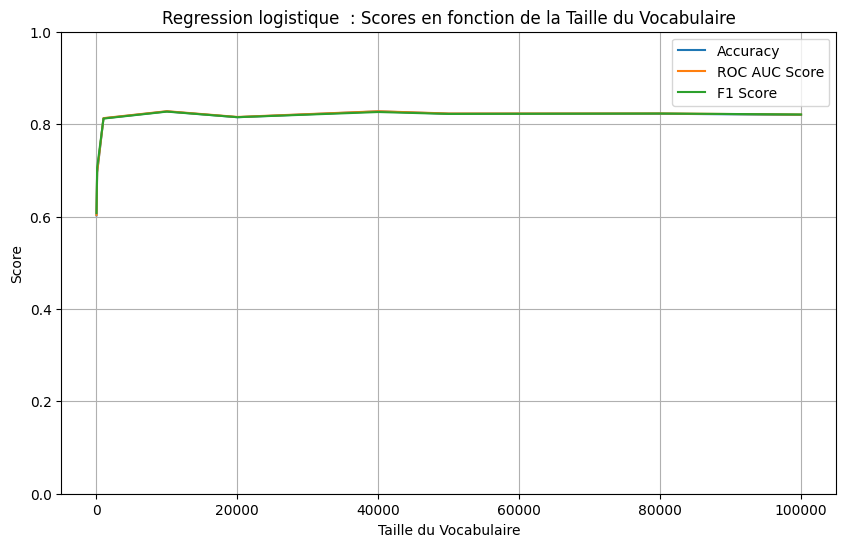

In [19]:
# Tracer les courbes
plt.figure(figsize=(10, 6))

plt.plot(size_features, acc_lr, label='Accuracy')
# plt.plot(size_features, f1_score_lr, label='F1 Score')
plt.plot(size_features, roc_auc_score_lr, label='ROC AUC Score')
plt.plot(size_features, f1_score_lr, label='F1 Score')

plt.xlabel('Taille du Vocabulaire')
plt.ylabel('Score')
plt.title('Regression logistique  : Scores en fonction de la Taille du Vocabulaire')
plt.ylim([0., 1.])
plt.legend()
plt.grid(True)
plt.show()

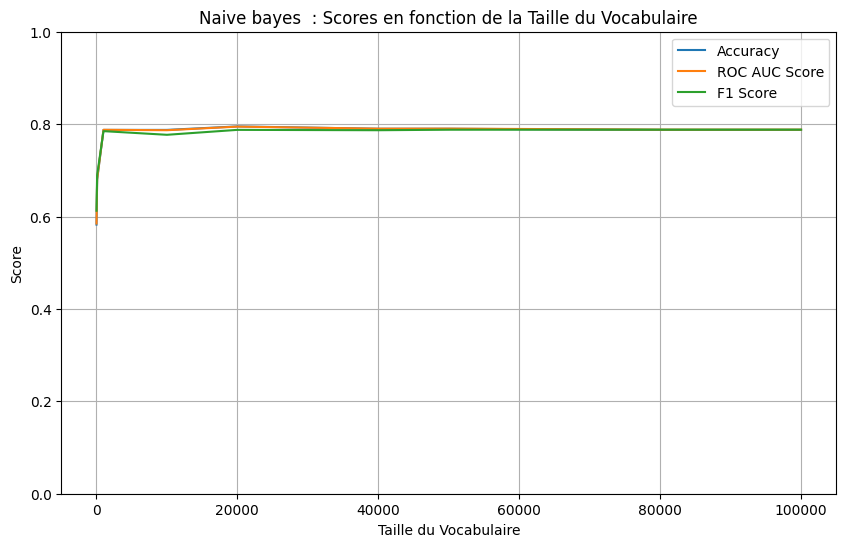

In [22]:
# Tracer les courbes
plt.figure(figsize=(10, 6))

plt.plot(size_features, acc_nb, label='Accuracy')
# plt.plot(size_features, f1_score_nb, label='F1 Score')
plt.plot(size_features, roc_auc_score_nb, label='ROC AUC Score')
plt.plot(size_features, f1_score_nb, label='F1 Score')


plt.xlabel('Taille du Vocabulaire')
plt.ylabel('Score')
plt.title('Naive bayes  : Scores en fonction de la Taille du Vocabulaire')
plt.ylim([0., 1.])
plt.legend()
plt.grid(True)
plt.show()

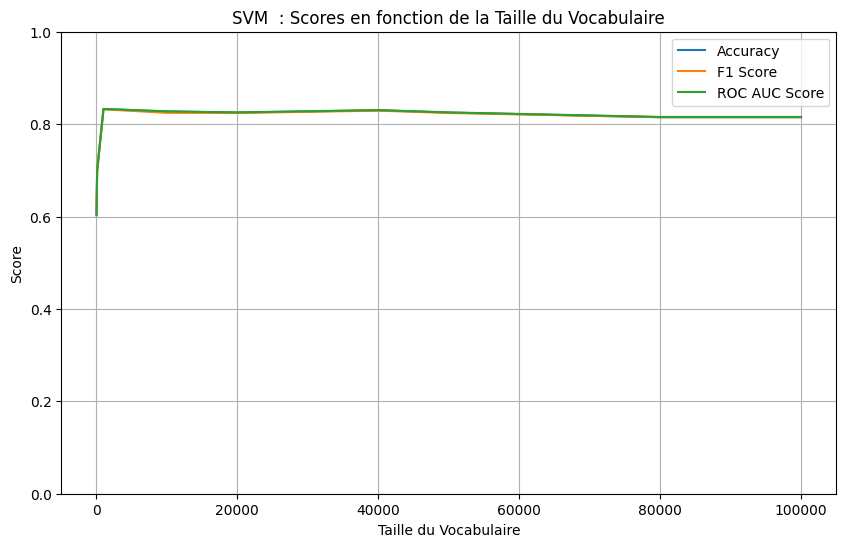

In [26]:
# Tracer les courbes
plt.figure(figsize=(10, 6))

plt.plot(size_features, acc_svm, label='Accuracy')
plt.plot(size_features, f1_score_svm, label='F1 Score')
plt.plot(size_features, roc_auc_score_svm, label='ROC AUC Score')

plt.xlabel('Taille du Vocabulaire')
plt.ylabel('Score')
plt.title('SVM  : Scores en fonction de la Taille du Vocabulaire')
plt.ylim([0., 1.])
plt.legend()
plt.grid(True)
plt.show()

## Comparaisons des temps d'execution : 

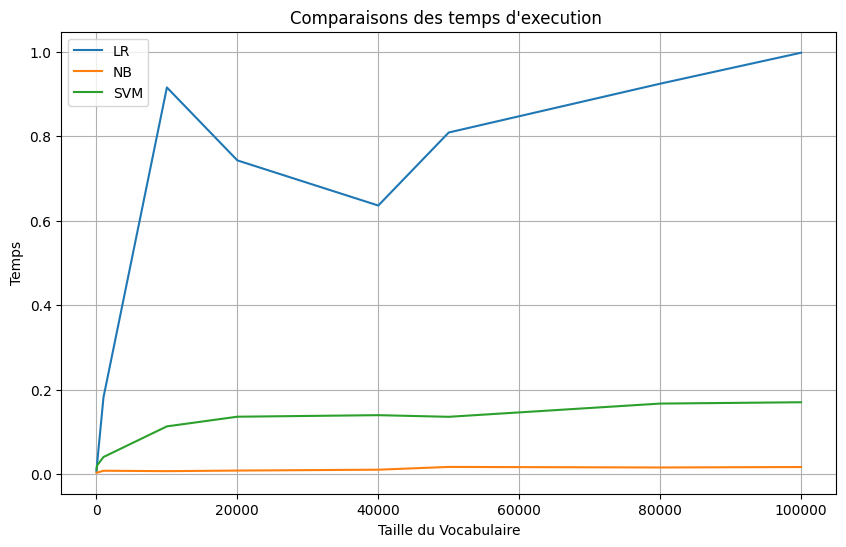

In [27]:
# Tracer les courbes
plt.figure(figsize=(10, 6))

plt.plot(size_features, temps_lr, label='LR')
plt.plot(size_features, temps_nb, label='NB')
plt.plot(size_features, temps_svm, label='SVM')

plt.xlabel('Taille du Vocabulaire')
plt.ylabel('Temps')
plt.title('Comparaisons des temps d\'execution ')
plt.legend()
plt.grid(True)
plt.show()

## Comparaison des performances : 

-   F1 score globale : 

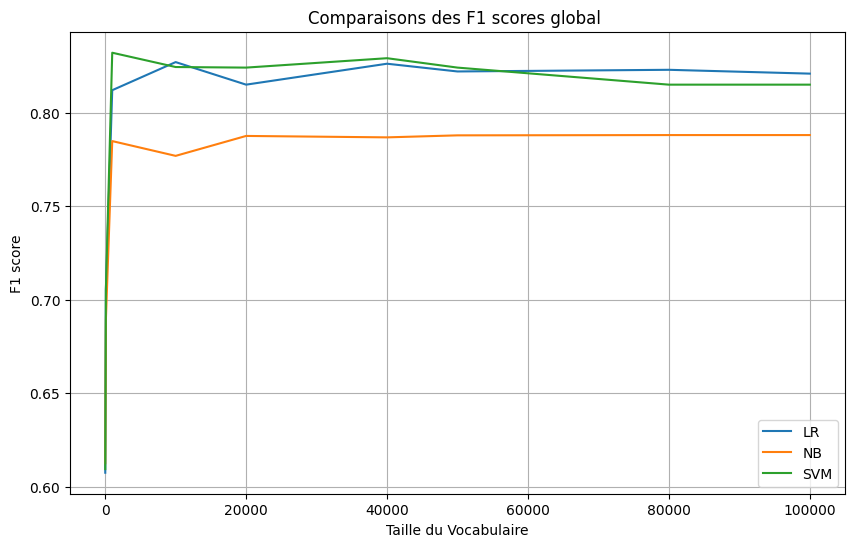

In [28]:
# Tracer les courbes
plt.figure(figsize=(10, 6))

plt.plot(size_features, f1_score_lr, label='LR')
plt.plot(size_features, f1_score_nb, label='NB')
plt.plot(size_features, f1_score_svm, label='SVM')

plt.xlabel('Taille du Vocabulaire')
plt.ylabel('F1 score')
plt.title('Comparaisons des F1 scores global ')
plt.legend()
plt.grid(True)
plt.show()

### Validation croisée : 

In [4]:
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold,cross_validate
def fonction_eval_validation_croisee(vectorizer,state,alltxts,alllabs):

    X = vectorizer.fit_transform(alltxts)
    y = alllabs

    [X_all_train, X_all_test, y_train, y_test]  = train_test_split(X, y, test_size=0.2, random_state=state, shuffle=True)

    #Logistic Regression
    t = 1e-8
    C=100.0
    lr_clf = LogisticRegression(random_state=0, solver='liblinear',max_iter=100, tol=t, C=C)

    lr_clf.fit(X_all_train, y_train)
    pred_lr = lr_clf.predict(X_all_test)

    #Linear SVM
    svm_clf = LinearSVC(random_state=0)
    svm_clf.fit(X_all_train, y_train)
    pred_svm = svm_clf.predict(X_all_test)


    print("--------------------------------Regression logistique ---------------")
    print("--------------------------------Simple split-------------------------")
    print(f"F1 score :  \t test= {f1_score(y_test, pred_lr)}")
    print(f"Précision :  \t test= {precision_score(y_test, pred_lr)}")
    print(f"Recall : \t test= {recall_score(y_test, pred_lr)}")
    print(f"ROC AUC :   \t test= {roc_auc_score(y_test, pred_lr)}")

    print("\n------------------------------Validation croisée -------------------")
    print(f"F1 score :  \t test= { np.mean(cross_val_score(lr_clf, X, y, scoring='f1'))}")
    print(f"Précision :  \t test= {np.mean(cross_val_score(lr_clf, X, y, scoring='precision'))}")
    print(f"Recall : \t test= {np.mean(cross_val_score(lr_clf, X, y, scoring='recall'))}")
    print(f"ROC AUC :   \t test= {np.mean(cross_val_score(lr_clf, X, y, scoring='roc_auc'))}")

    print("--------------------------------SVM----------------------------------")
    print("--------------------------------Simple split-------------------------")
    print(f"F1 score :  \t test= {f1_score(y_test, pred_svm)}")
    print(f"Précision :  \t test= {precision_score(y_test, pred_svm)}")
    print(f"Recall : \t test= {recall_score(y_test, pred_svm)}")
    print(f"ROC AUC :   \t test= {roc_auc_score(y_test, pred_svm)}")

    print("\n------------------------------Validation croisée -------------------")
    print(f"F1 score :  \t test= { np.mean(cross_val_score(svm_clf, X, y, scoring='f1'))}")
    print(f"Précision :  \t test= {np.mean(cross_val_score(svm_clf, X, y, scoring='precision'))}")
    print(f"Recall : \t test= {np.mean(cross_val_score(svm_clf, X, y, scoring='recall'))}")
    print(f"ROC AUC :   \t test= {np.mean(cross_val_score(svm_clf, X, y, scoring='roc_auc'))}")



In [9]:
tf_idf_vectorizer =TfidfVectorizer(preprocessor=f, ngram_range=(1, 2), stop_words='english',tokenizer=word_tokenize, lowercase=True, max_features=20000)

fonction_eval_validation_croisee(tf_idf_vectorizer,10,alltxts,alllabs)


--------------------------------Regression logistique ---------------
--------------------------------Simple split-------------------------
F1 score :  	 test= 0.8258706467661691
Précision :  	 test= 0.8019323671497585
Recall : 	 test= 0.8512820512820513
ROC AUC :   	 test= 0.8256410256410258

------------------------------Validation croisée -------------------
F1 score :  	 test= 0.8395840422180019
Précision :  	 test= 0.8337281820362159
Recall : 	 test= 0.8459999999999999
ROC AUC :   	 test= 0.923265
--------------------------------SVM----------------------------------
--------------------------------Simple split-------------------------
F1 score :  	 test= 0.8308457711442785
Précision :  	 test= 0.8067632850241546
Recall : 	 test= 0.8564102564102564
ROC AUC :   	 test= 0.8306441525953722

------------------------------Validation croisée -------------------
F1 score :  	 test= 0.8400523496512466
Précision :  	 test= 0.8348746558422384
Recall : 	 test= 0.8459999999999999
ROC AUC :   	

Nous constons que les résultats sont pratiquement les mêmes sauf pour ROC AUC

## Stabilité de la validation croisée : 
Nous effectuon notre test avec le model de regression logistique : 
-   Nous varions notre K .
-   Nous utilisons également diffèrents valeurs de seed.

In [10]:
tf_idf_vectorizer =TfidfVectorizer(preprocessor=f, ngram_range=(1, 2), stop_words='english',tokenizer=word_tokenize, lowercase=True, max_features=20000)

X = tf_idf_vectorizer.fit_transform(alltxts)
y = alllabs

t = 1e-8
C=100.0

seeds = [ i for i in range(1,50,5)]
K = [ i for i in range(2,14,2)]


scores_k = { i : [] for i in K}
for k in K:
    print(k)
    f1_score_list = []
    roc_auc_list = []
    acc_list = []
    for seed in seeds : 
        print(seed)
        skf = StratifiedKFold(n_splits=k, random_state=seed, shuffle=True)

        lr_clf = LogisticRegression(random_state=seed, solver='liblinear',max_iter=100, tol=t, C=C)

        scores = cross_validate(lr_clf, X, y, cv=skf, scoring=['f1','accuracy','roc_auc'])
        f1_score_list.append(np.mean(scores['test_f1']))
        print(np.mean(scores['test_f1']))
        roc_auc_list.append(np.mean(scores['test_roc_auc']))
        print(np.mean(scores['test_roc_auc']))
        acc_list.append(np.mean(scores['test_accuracy']))
        print(np.mean(scores['test_accuracy']))

    scores_k[k] = [f1_score_list,roc_auc_list,acc_list]





/home/anyes/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


2
1
0.8169318403115872
0.896898
0.8145
6
0.8113634634406148
0.896244
0.8115
11
0.827566187639672
0.90157
0.827
16
0.8063535577584446
0.8938240000000001
0.8055000000000001
21
0.826379653115788
0.897718
0.8245
26
0.8105259180897688
0.8841339999999999
0.81
31
0.8118762166140471
0.884382
0.81
36
0.8272350506819444
0.903888
0.8274999999999999
41
0.8257319985412965
0.897572
0.824
46
0.8162991597964577
0.8914559999999999
0.815
4
1
0.8462152841000906
0.91688
0.844
6
0.8427788876573725
0.9174279999999999
0.841
11
0.8509848930851321
0.9186960000000001
0.85
16
0.8400940414557863
0.9185200000000001
0.8385
21
0.8426258562358282
0.9158000000000001
0.8420000000000001
26
0.8441591643285058
0.916936
0.8435
31
0.8316221061666093
0.909504
0.831
36
0.8471856966042824
0.921468
0.847
41
0.8424917781204413
0.917824
0.8415
46
0.8302275901636101
0.9125359999999999
0.829
6
1
0.8541837545315984
0.9239684544049481
0.8520241798684913
6
0.8507991845538151
0.9240344791983021
0.8495006983030935
11
0.8456082650700218


In [11]:
(len(scores_k[2][0]))

10

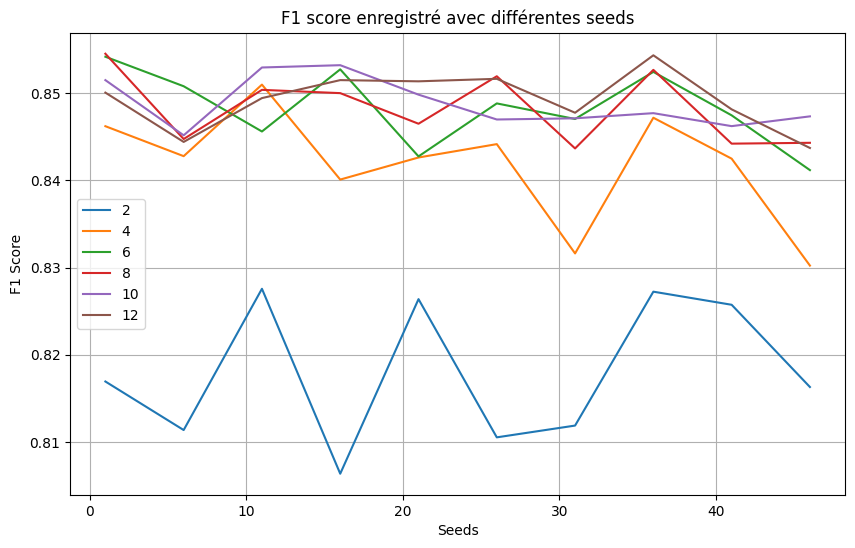

In [12]:

# Tracer les courbes
plt.figure(figsize=(10, 6))

plt.plot(seeds, scores_k[2][0],label="2")
plt.plot(seeds, scores_k[4][0],label="4")
plt.plot(seeds, scores_k[6][0],label="6")
plt.plot(seeds, scores_k[8][0],label="8")
plt.plot(seeds, scores_k[10][0],label="10")
plt.plot(seeds, scores_k[12][0],label="12")

plt.xlabel('Seeds')
plt.ylabel('F1 Score')
plt.title('F1 score enregistré avec différentes seeds')
plt.legend()
plt.grid(True)
plt.show()

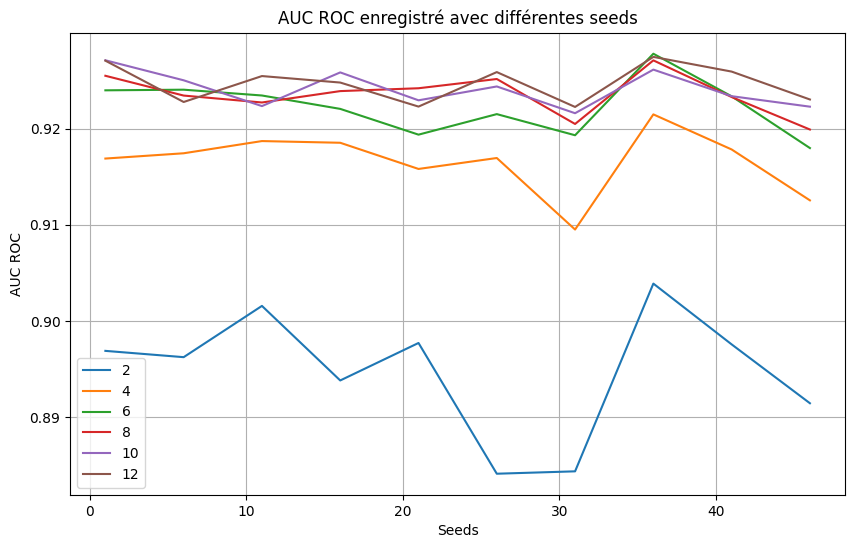

In [13]:

# Tracer les courbes
plt.figure(figsize=(10, 6))

plt.plot(seeds, scores_k[2][1],label="2")
plt.plot(seeds, scores_k[4][1],label="4")
plt.plot(seeds, scores_k[6][1],label="6")
plt.plot(seeds, scores_k[8][1],label="8")
plt.plot(seeds, scores_k[10][1],label="10")
plt.plot(seeds, scores_k[12][1],label="12")

plt.xlabel('Seeds')
plt.ylabel('AUC ROC')
plt.title('AUC ROC enregistré avec différentes seeds')
plt.legend()
plt.grid(True)
plt.show()

En visualisant ces graphes resultants nous arrions a voir que les resultas de la validation croisée commencent a se stabiliser a partir d'un fold = 8 a peu près et que toutes les courbes de scores correspondant a des fold >= 8 **sont assez stables**

In [14]:
import seaborn as sns 

<Axes: xlabel='Metric', ylabel='Score'>

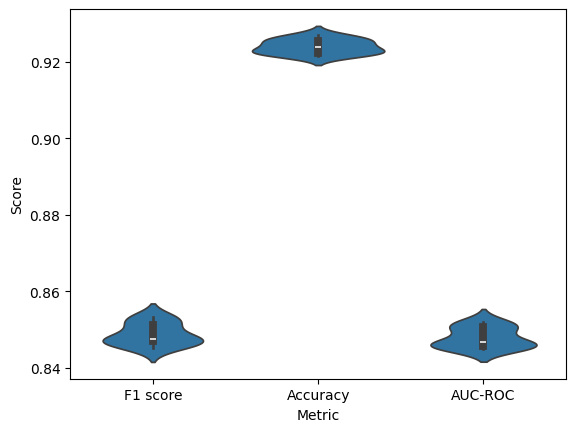

In [18]:
data = pd.DataFrame({
    'Metric': ['F1 score'] * len(scores_k[2][0]) + ['Accuracy'] * len(scores_k[12][0]) + ['AUC-ROC'] * len(scores_k[12][0]),
    'Score': scores_k[10][0] + scores_k[10][1] + scores_k[10][2]
})

sns.violinplot(data=data, x='Metric', y='Score')

In [20]:
print(f'Accuracy moyenne : {np.mean(scores_k[10][1])}, Variance :  {np.std(scores_k[10][1])}')
print(f'Auc roc moyen : {np.mean(scores_k[10][2])} , Variance : { np.std(scores_k[10][2])}')
print(f'F1-score moyen: {np.mean(scores_k[10][0])} , Variance : {np.std(scores_k[10][0])}')

Accuracy moyenne : 0.92409, Variance :  0.0017779707534152428
Auc roc moyen : 0.8479000000000001 , Variance : 0.0025475478405714096
F1-score moyen: 0.8488047085367052 , Variance : 0.002725898411072927
